In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## The change in student to teacher ratio in Queensland’s government-run secondary schools over time. 

### Questions answered below 
* What is the change in " Student to Teaching Staff Ratio " of government-run secondary schools in Queensland compare with other schools ?
* What is the change in " Student to Teaching Staff Ratio " of government-run secondary schools of Queensland compared with other states ?

In [3]:
df = pd.read_csv('C:/Users/sobin/Downloads/New folder/STR.csv')
display(df)

,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
0,2023,a NSW,a Government,a Primary School,14.9
1,2023,a NSW,a Government,b Secondary School,13.2
2,2023,a NSW,a Government,c All Levels,14.1
3,2023,a NSW,b Non-Government,a Primary School,15.1
4,2023,a NSW,b Non-Government,b Secondary School,11.1
...,...,...,...,...,...
2425,2006,i Aust.,d Independent,b Secondary School,10.7
2426,2006,i Aust.,d Independent,c All Levels,12.1
2427,2006,i Aust.,e All Affiliations,a Primary School,16.0
2428,2006,i Aust.,e All Affiliations,b Secondary School,12.2


In [4]:
unique_values = df['State/Territory'].unique()
print( unique_values)

['a NSW' 'b Vic.' 'c Qld' 'd SA' 'e WA' 'f Tas.' 'g NT' 'h ACT' 'i Aust.']


In [5]:
unique_values = df['Affiliation'].unique()
print( unique_values)

['a Government' 'b Non-Government' 'c Catholic' 'd Independent'
 'e All Affiliations']


In [6]:
unique_values = df['School Level'].unique()
print( unique_values)

['a Primary School' 'b Secondary School' 'c All Levels' 'a Primary school'
 'b Secondary school']


In [7]:
sc = df[df['School Level'] == 'b Secondary School']
display(sc)

,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
1,2023,a NSW,a Government,b Secondary School,13.2
4,2023,a NSW,b Non-Government,b Secondary School,11.1
7,2023,a NSW,c Catholic,b Secondary School,12.1
10,2023,a NSW,d Independent,b Secondary School,10.0
13,2023,a NSW,e All Affiliations,b Secondary School,12.2
...,...,...,...,...,...
2416,2006,i Aust.,a Government,b Secondary School,12.4
2419,2006,i Aust.,b Non-Government,b Secondary School,11.8
2422,2006,i Aust.,c Catholic,b Secondary School,12.9
2425,2006,i Aust.,d Independent,b Secondary School,10.7


Change in " Student to Teaching Staff Ratio " of government-run secondary schools in Queensland compared with other schools.

In [8]:
qld_sc = sc[sc['State/Territory'] == 'c Qld']
qld_sc = qld_sc[qld_sc['Affiliation'] != 'e All Affiliations']

In [9]:
qld_sc_2006 = qld_sc[qld_sc['Year'] == 2006]
average_ratio_by_affiliation = qld_sc_2006.groupby('Affiliation')['Student to Teaching Staff Ratio'].mean()
print(average_ratio_by_affiliation)

Affiliation
a Government        13.0
b Non-Government    12.5
c Catholic          13.0
d Independent       12.0
Name: Student to Teaching Staff Ratio, dtype: float64


In [10]:
qld_sc_2006 = qld_sc[qld_sc['Year'] == 2023]
average_ratio_by_affiliation = qld_sc_2006.groupby('Affiliation')['Student to Teaching Staff Ratio'].mean()
print(average_ratio_by_affiliation)

Affiliation
a Government        12.0
b Non-Government    12.0
c Catholic          12.3
d Independent       11.8
Name: Student to Teaching Staff Ratio, dtype: float64


% change in " Student to Teaching Staff Ratio " from 2006 to 2023 

In [11]:
a  = (( 12.0 - 13.0 ) / 13.0)*100
b  = (( 12.0 - 12.5 ) / 12.5)*100
c  = (( 12.3 - 13.0 ) / 13.0)*100
d  = (( 11.8 - 12.0 ) / 12.0)*100

print("Government:", a)
print("Non-Government :", b)
print("Catholic:", c)
print("Independent:", d)

Government: -7.6923076923076925
Non-Government : -4.0
Catholic: -5.38461538461538
Independent: -1.6666666666666607


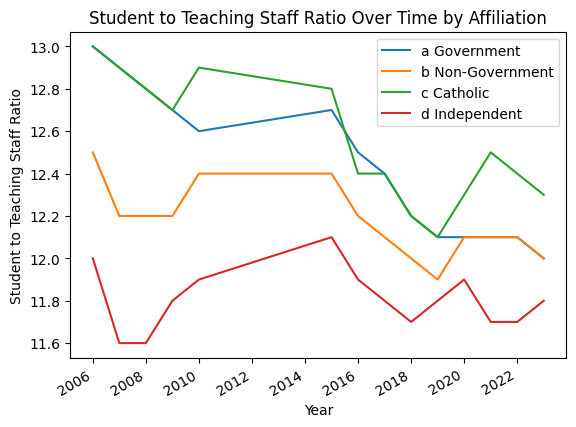

In [12]:
qld_sc['Year'] = pd.to_datetime(qld_sc['Year'], format='%Y')
fig, ax = plt.subplots()
for affiliation, group in qld_sc.groupby('Affiliation'):
    group.plot(x='Year', y='Student to Teaching Staff Ratio', label=affiliation, ax=ax)
plt.title('Student to Teaching Staff Ratio Over Time by Affiliation')
plt.xlabel('Year')
plt.ylabel('Student to Teaching Staff Ratio')
plt.legend()
plt.show()

Change in " Student to Teaching Staff Ratio " of government-run secondary schools of Queensland compared with other states.

In [13]:
gv_sc = sc[sc['Affiliation'] == 'a Government']
display(gv_sc)

,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
1,2023,a NSW,a Government,b Secondary School,13.2
16,2023,b Vic.,a Government,b Secondary School,11.5
31,2023,c Qld,a Government,b Secondary School,12.0
46,2023,d SA,a Government,b Secondary School,12.9
61,2023,e WA,a Government,b Secondary School,12.7
...,...,...,...,...,...
2356,2006,e WA,a Government,b Secondary School,12.5
2371,2006,f Tas.,a Government,b Secondary School,13.2
2386,2006,g NT,a Government,b Secondary School,11.2
2401,2006,h ACT,a Government,b Secondary School,11.9


In [14]:
average_ratio_by_state = gv_sc.groupby('State/Territory')['Student to Teaching Staff Ratio'].mean()
print(average_ratio_by_state)

State/Territory
a NSW      12.757143
b Vic.     12.007143
c Qld      12.442857
d SA       12.778571
e WA       12.378571
f Tas.     12.778571
g NT       11.664286
h ACT      12.171429
i Aust.    12.428571
Name: Student to Teaching Staff Ratio, dtype: float64


In [15]:
gv_sc_2006 = gv_sc[gv_sc['Year'] == 2006]
average_ratio_by_state = gv_sc_2006.groupby('State/Territory')['Student to Teaching Staff Ratio'].mean()
print(average_ratio_by_state)

State/Territory
a NSW      12.4
b Vic.     11.9
c Qld      13.0
d SA       12.5
e WA       12.5
f Tas.     13.2
g NT       11.2
h ACT      11.9
i Aust.    12.4
Name: Student to Teaching Staff Ratio, dtype: float64


In [16]:
gv_sc_2006 = gv_sc[gv_sc['Year'] == 2023]
average_ratio_by_state = gv_sc_2006.groupby('State/Territory')['Student to Teaching Staff Ratio'].mean()
print(average_ratio_by_state)

State/Territory
a NSW      13.2
b Vic.     11.5
c Qld      12.0
d SA       12.9
e WA       12.7
f Tas.     11.8
g NT       11.4
h ACT      12.8
i Aust.    12.3
Name: Student to Teaching Staff Ratio, dtype: float64


% change in " Student to Teaching Staff Ratio " from 2006 to 2023 

In [17]:
a  = (( 13.2 - 12.4 ) / 13.0)*100
b  = (( 11.5 - 11.9 ) / 12.5)*100
c  = (( 12.0 - 13.0 ) / 13.0)*100


print("NSW:", a)
print("Vic.:", b)
print("Qld:", c)

NSW: 6.153846153846146
Vic.: -3.200000000000003
Qld: -7.6923076923076925


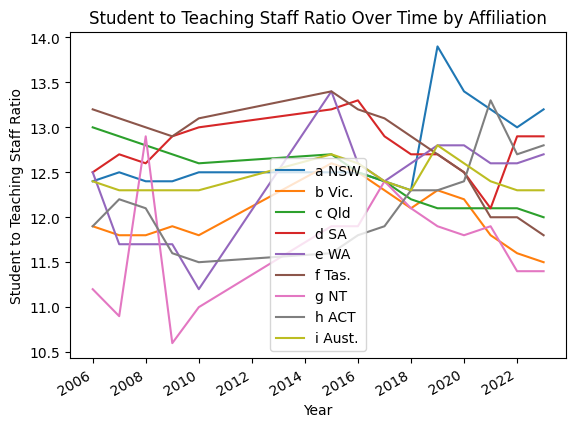

In [18]:
gv_sc['Year'] = pd.to_datetime(gv_sc['Year'], format='%Y') 
fig, ax = plt.subplots()
for key, group in gv_sc.groupby('State/Territory'):
    group.plot(x='Year', y='Student to Teaching Staff Ratio', label=key, ax=ax)
plt.title('Student to Teaching Staff Ratio Over Time by Affiliation')
plt.xlabel('Year')
plt.ylabel('Student to Teaching Staff Ratio')
plt.legend()
plt.show()